In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


In [27]:
# import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import calendar
%matplotlib inline
import matplotlib.ticker as ticker
import plotly.express as px

In [28]:
df=pd.read_csv("/kaggle/input/sales-forecasting/train.csv",parse_dates=["Order Date","Ship Date"])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [29]:
del df["Row ID"]

In [30]:
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [32]:
df.nunique()

Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [33]:
# Describing the data
df.describe()

,Postal Code,Sales
count,9789.000000,9800.000000
mean,55273.322403,230.769059
std,32041.223413,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [34]:
df.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [35]:
df["Postal Code"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Name: Postal Code, Length: 9800, dtype: bool

In [36]:
df[df['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [37]:
Burlington_postal_code = df[df['City']=='Burlington'][['State','Postal Code','Region']]
Burlington_postal_code
#df[["City","Postal Code","State"]][df['Postal Code'].isna()]

,State,Postal Code,Region
683,North Carolina,27217.0,South
684,North Carolina,27217.0,South
1008,Iowa,52601.0,Central
1038,North Carolina,27217.0,South
1039,North Carolina,27217.0,South
1393,North Carolina,27217.0,South
2234,Vermont,NaN,East
2928,North Carolina,27217.0,South
5065,North Carolina,27217.0,South
5066,North Carolina,27217.0,South


In [38]:
df['Postal Code'] = df['Postal Code'].fillna(05401.0)  # df=df.replace({"Postal Code":np.NaN},"05401")
df.isnull().sum()                                     # df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [39]:
# sorting data by order date
df.sort_values(by =['Order Date'], inplace = True, ascending = True)

In [40]:
df[df.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df_state=df[["State","Sales"]]
df_state

,State,Sales
540,Wisconsin,468.900
5713,New York,5.940
157,Washington,457.568
6548,Illinois,17.472
7949,Texas,63.552
...,...,...
908,New York,52.776
645,Indiana,209.300
907,New York,90.930
906,New York,323.136


In [43]:
df_state=df_state.groupby("State").sum()
df_state=df_state.sort_values(by="Sales",ascending=False)
df_state

,Sales
State,
California,446306.4635
New York,306361.1470
Texas,168572.5322
Washington,135206.8500
Pennsylvania,116276.6500
Florida,88436.5320
Illinois,79236.5170
Michigan,76136.0740
Ohio,74848.9780


In [44]:
df_state=df_state.reset_index()
df_state=df_state.sort_values(by="Sales",ascending=False,ignore_index=True).head(10)
df_state

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,74848.9780
9,Virginia,70636.7200


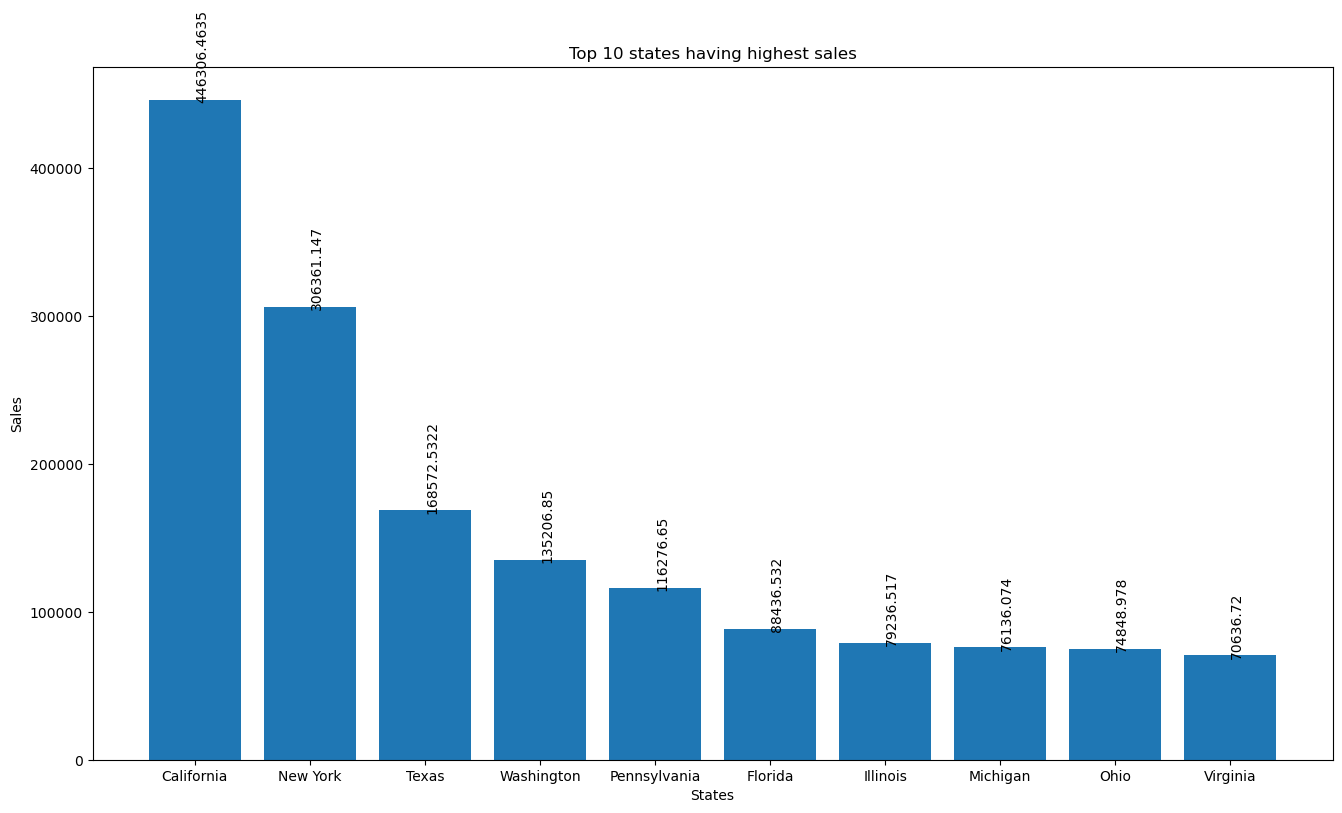

In [45]:
plt.figure(figsize=(16,9))
plt.bar(df_state["State"],df_state["Sales"])
plt.xlabel("States")
plt.ylabel("Sales")
plt.title("Top 10 states having highest sales")
for x,y in df_state["Sales"].items():
    plt.text(x,y,str(y),rotation=90)
plt.show()

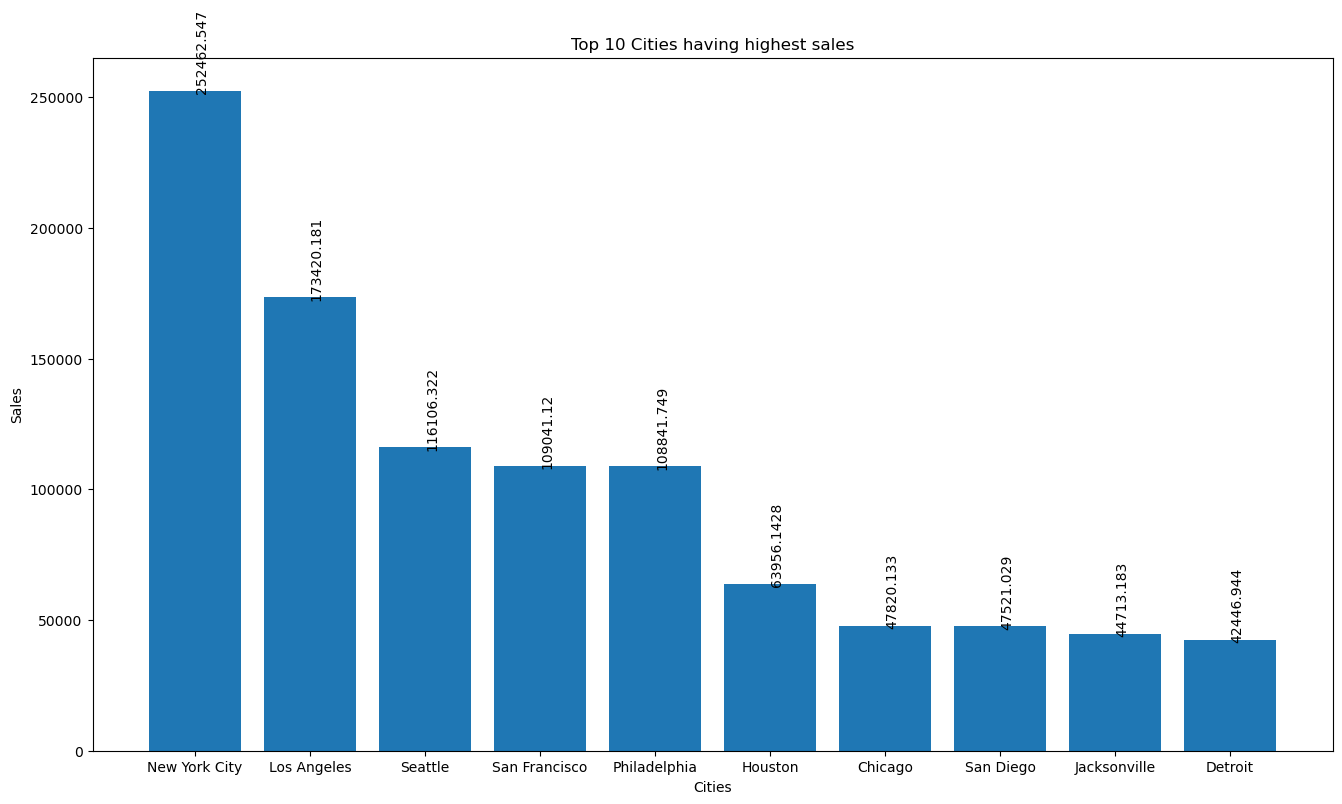

In [46]:
df_city=df[["City","Sales"]]
df_city=df_city.sort_values(by="Sales",ascending=False)
df_city=df_city.groupby("City").sum()
df_city=df_city.reset_index()
df_city=df_city.sort_values(by="Sales",ascending=False,ignore_index=True).head(10)
plt.figure(figsize=(16,9))
plt.bar(df_city["City"],df_city["Sales"])
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.title("Top 10 Cities having highest sales")
for x,y in df_city["Sales"].items():
    plt.text(x,y,str(y),rotation=90)
plt.show()

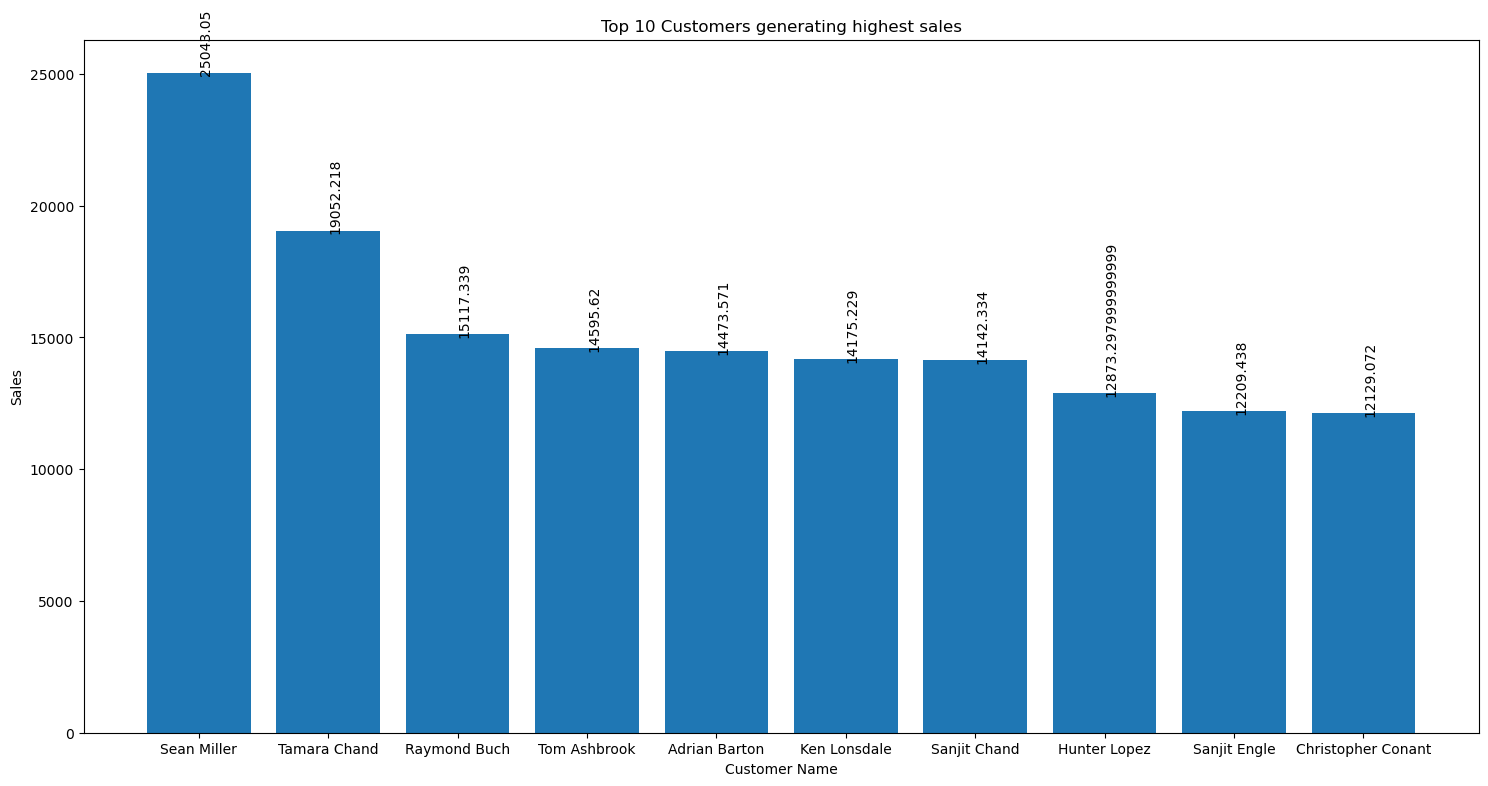

In [47]:
df_cus=df[["Customer Name","Sales"]]
df_cus=df_cus.sort_values(by="Sales",ascending=False)
df_cus=df_cus.groupby("Customer Name").sum()
df_cus=df_cus.reset_index()
df_cus=df_cus.sort_values(by="Sales",ascending=False,ignore_index=True).head(10)
plt.figure(figsize=(18,9))
plt.bar(df_cus["Customer Name"],df_cus["Sales"])
plt.xlabel("Customer Name")
plt.ylabel("Sales")
plt.title("Top 10 Customers generating highest sales")
for x,y in df_cus["Sales"].items():
    plt.text(x,y,str(y),rotation=90)
plt.show()

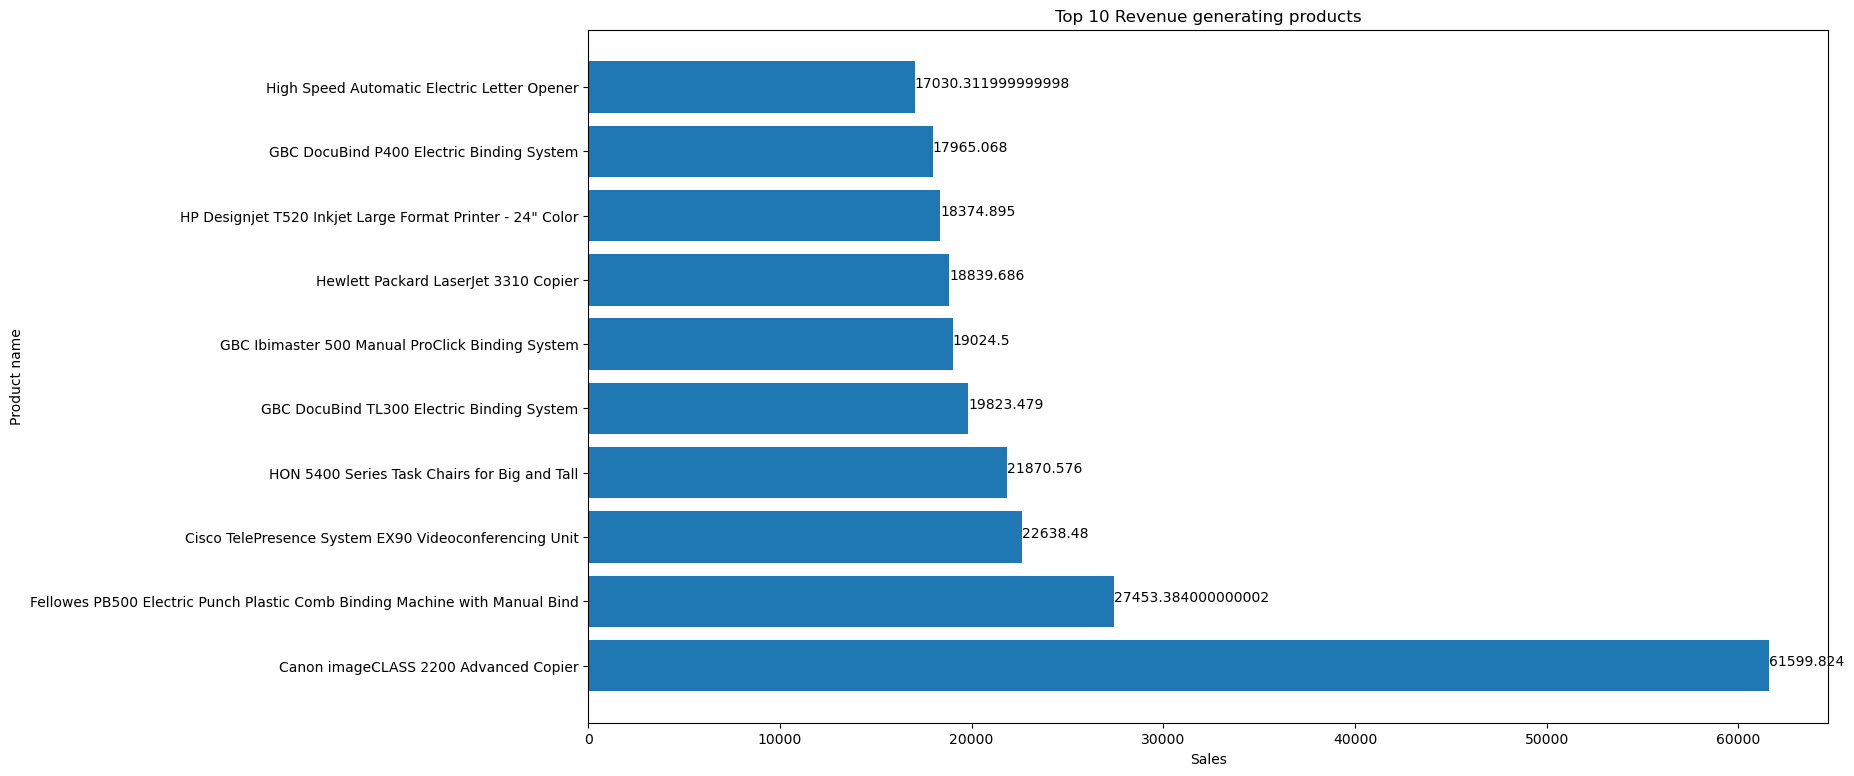

In [48]:
df_pr=df[["Product Name","Sales"]]
df_pr=df_pr.sort_values(by="Sales",ascending=False)
df_pr=df_pr.groupby("Product Name").sum()
df_pr=df_pr.reset_index()
df_pr=df_pr.sort_values(by="Sales",ascending=False,ignore_index=True).head(10)
plt.figure(figsize=(16,9))
plt.barh(df_pr["Product Name"],df_pr["Sales"])
plt.title("Top 10 Revenue generating products")
plt.xlabel("Sales")
plt.ylabel("Product name")
for x,y in df_pr["Sales"].items():
    plt.text(y,x,str(y))
plt.show()

In [49]:
df_re=df[["Region","Sales"]]
df_re

,Region,Sales
540,Central,468.900
5713,East,5.940
157,West,457.568
6548,Central,17.472
7949,Central,63.552
...,...,...
908,East,52.776
645,Central,209.300
907,East,90.930
906,East,323.136


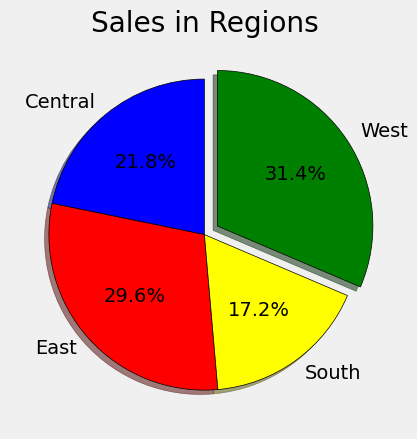

In [50]:
df_re=df_re.groupby("Region").sum()
df_re=df_re.reset_index()
region=df_re["Region"].tolist()
plt.style.use('fivethirtyeight')
region=df_re["Region"].tolist()
plt.tight_layout()
plt.title("Sales in Regions")
colors=["blue","red","yellow","green"]
explode=[0,0,0,0.1]
plt.pie(df_re["Sales"],labels=region,colors=colors,wedgeprops={"edgecolor":"black"},shadow=True,explode=explode,
        startangle=90,autopct="%1.1f%%")
plt.show()

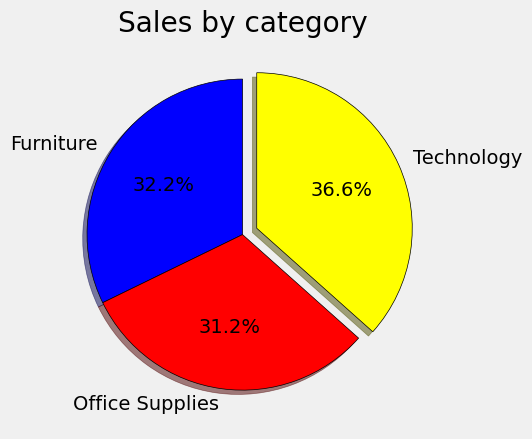

In [52]:
df_ca=df[["Category","Sales"]]
df_ca=df_ca.groupby("Category").sum()
df_ca=df_ca.reset_index()
plt.style.use('fivethirtyeight')
region=df_ca["Category"].tolist()
plt.tight_layout()
plt.title("Sales by category")
colors=["blue","red","yellow"]
explode=[0,0,0.1]
plt.pie(df_ca["Sales"],labels=region,colors=colors,wedgeprops={"edgecolor":"black"},shadow=True,explode=explode,
        startangle=90,autopct="%1.1f%%")
plt.show()

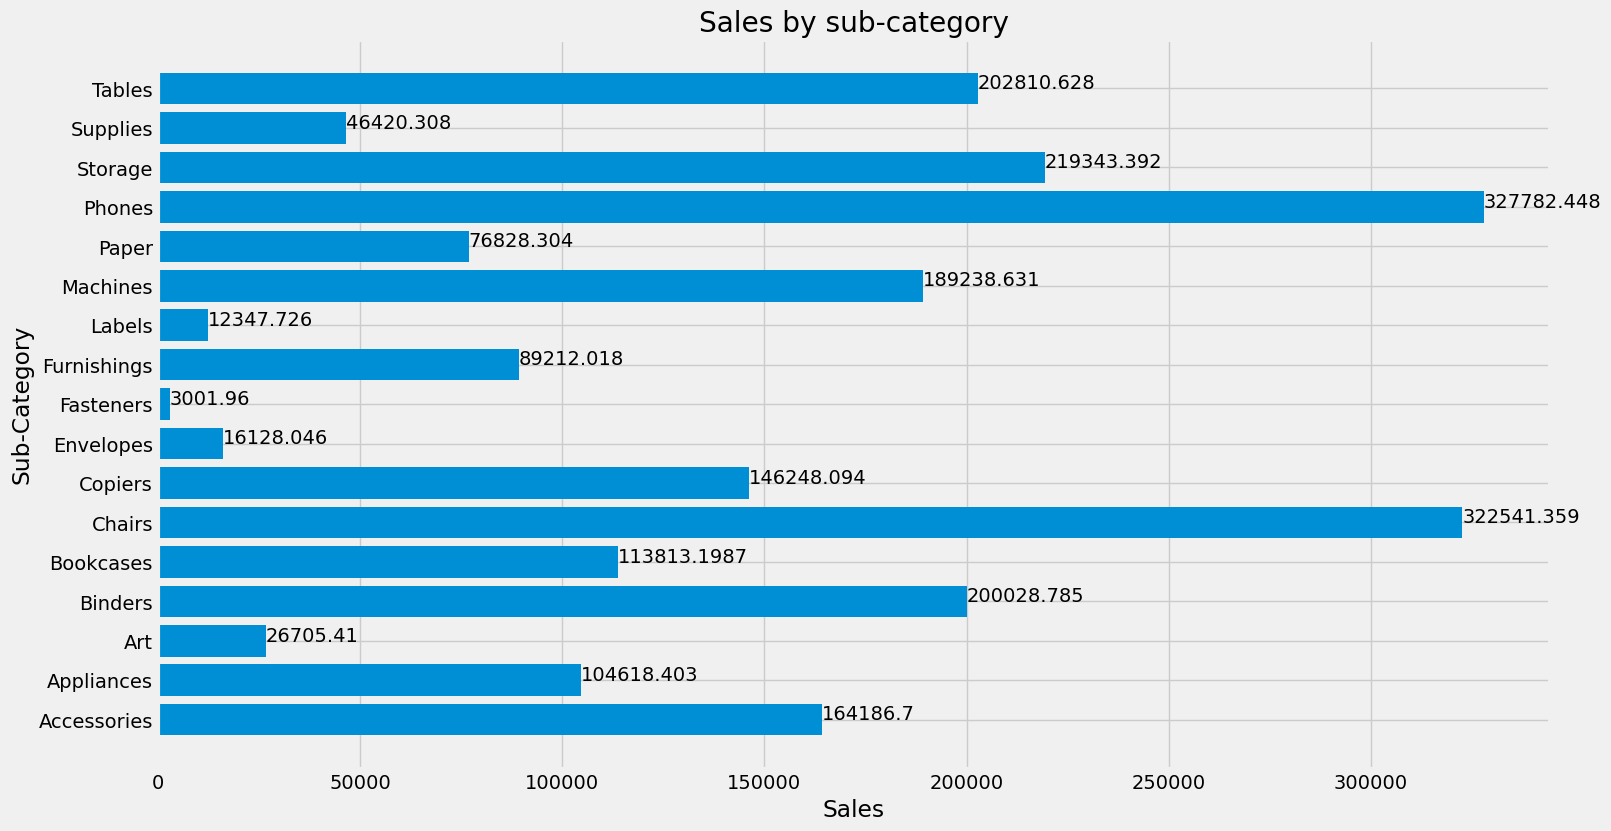

In [53]:
df_sub=df[["Sub-Category","Sales"]]
df_sub=df_sub.groupby("Sub-Category").sum()
df_sub=df_sub.reset_index()
plt.figure(figsize=(16,9))
plt.barh(df_sub["Sub-Category"],df_sub["Sales"])
plt.title("Sales by sub-category")
plt.xlabel("Sales")
plt.ylabel("Sub-Category")
for x,y in df_sub["Sales"].items():
    plt.text(y,x,str(y))
plt.show()

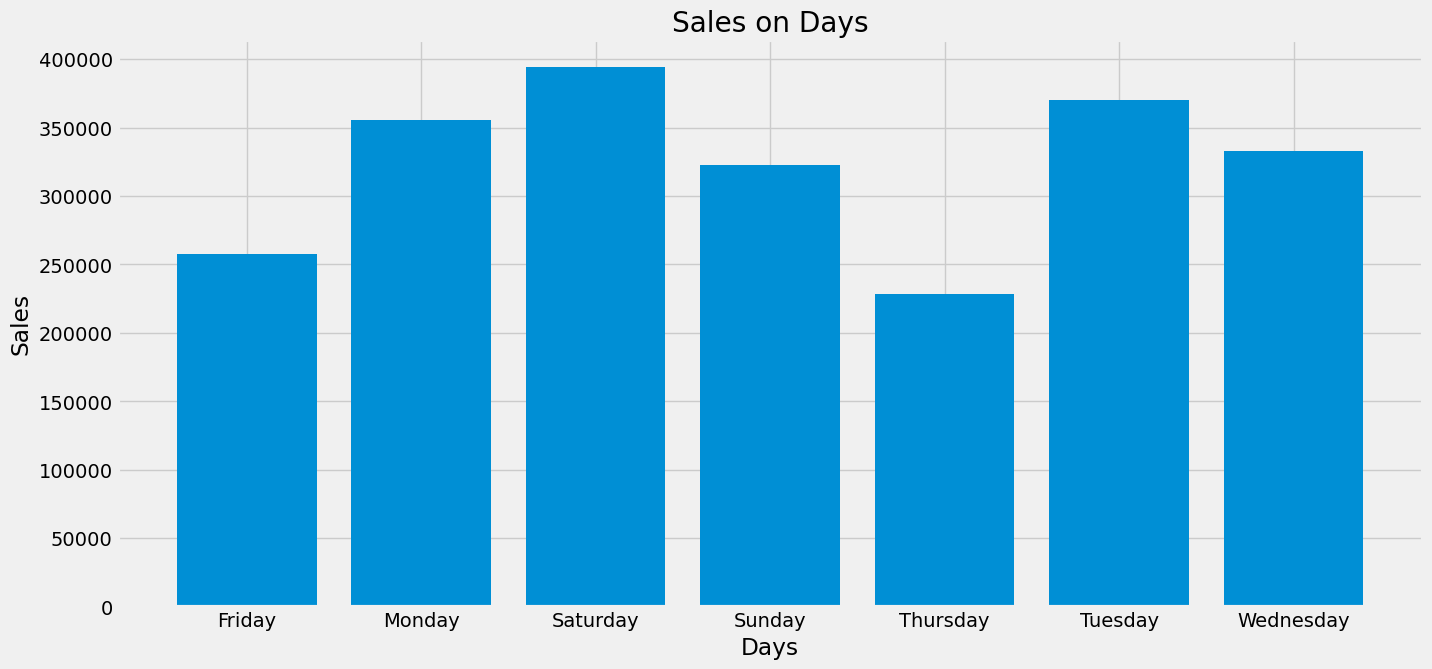

In [55]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['weekday'] = df['Order Date'].dt.dayofweek.map(dayOfWeek)
df_day=df[["weekday",'Sales']]
df_day=df_day.groupby('weekday').sum()
df_day=df_day.reset_index()
plt.figure(figsize=(15,7))
plt.bar(df_day["weekday"],df_day['Sales'])
plt.title('Sales on Days')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

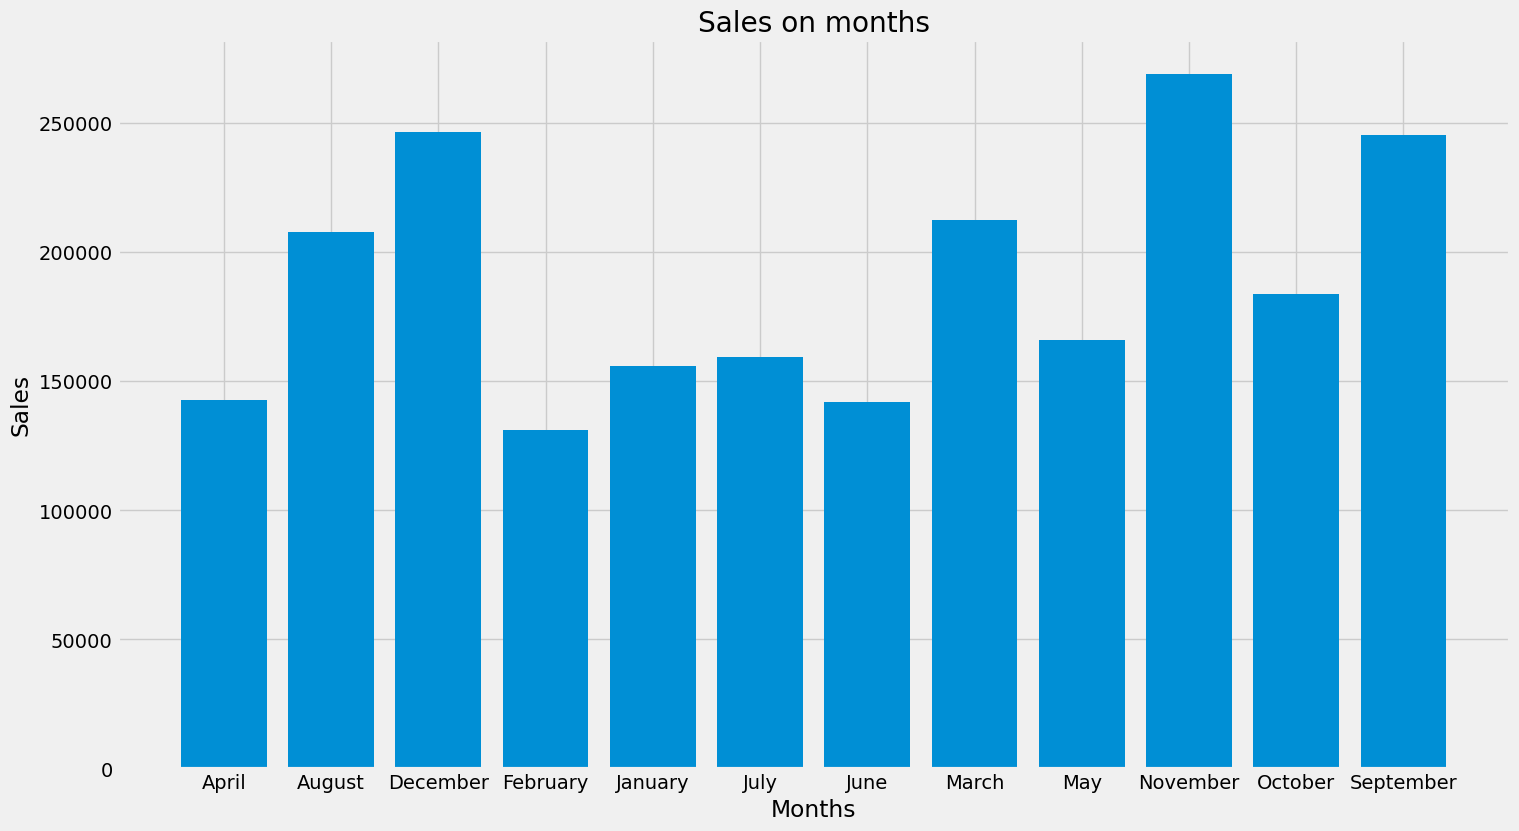

In [56]:
df["Month"]=df["Order Date"].dt.month_name()
df_mo=df[["Month","Sales"]]
df_mo=df_mo.groupby("Month").sum()
df_mo=df_mo.reset_index()
plt.figure(figsize=(16,9))
plt.bar(df_mo["Month"],df_mo['Sales'])
plt.title('Sales on months')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

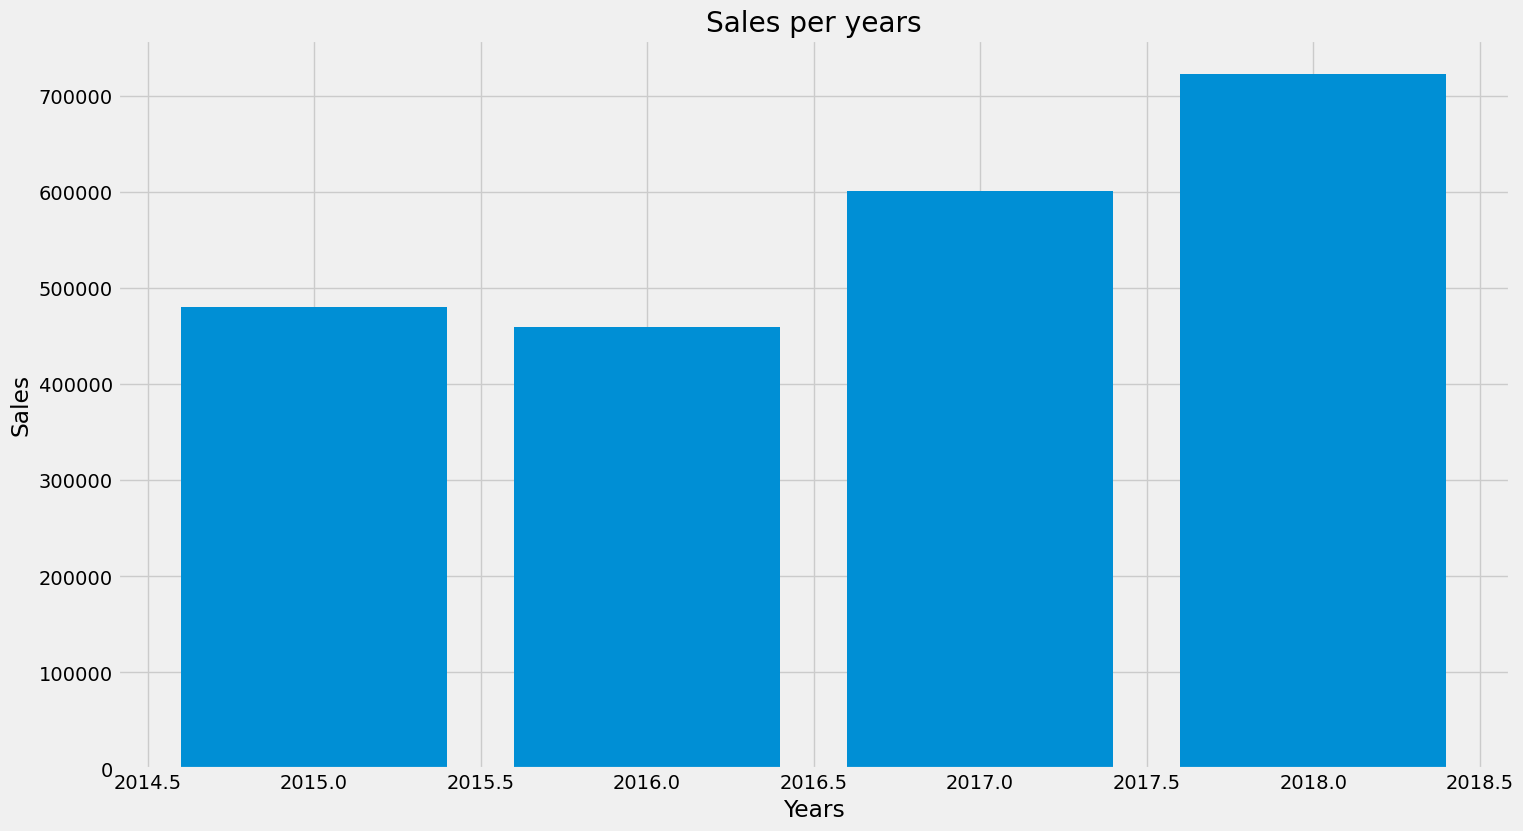

In [57]:
df['Year']=df["Order Date"].dt.year
df_yr=df[["Year","Sales"]]
df_yr=df_yr.groupby("Year").sum()
df_yr=df_yr.reset_index()
df_yr=df_yr.sort_values(by="Year",ascending=False,ignore_index=True)
plt.figure(figsize=(16,9))
plt.bar(df_yr["Year"],df_yr['Sales'])
plt.title('Sales per years')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

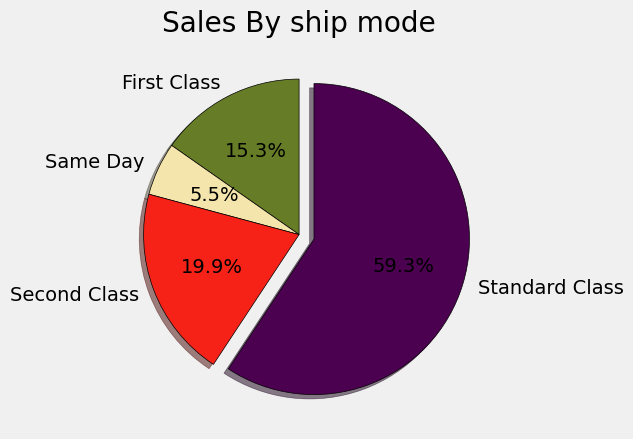

In [58]:
df_ship=df[["Ship Mode","Sales"]]
df_ship=df_ship.groupby("Ship Mode").sum()
df_ship=df_ship.reset_index()
plt.style.use('fivethirtyeight')
ship=df_ship["Ship Mode"].tolist()
plt.tight_layout()
plt.title("Sales By ship mode")
colors=["#667C26","#F3E5AB","#F62217","#4B0150"]
explode=[0,0,0,0.1]
plt.pie(df_ship["Sales"],labels=ship,colors=colors,wedgeprops={"edgecolor":"black"},shadow=True,explode=explode,
        startangle=90,autopct="%1.1f%%")
plt.show()

<AxesSubplot:xlabel='Category', ylabel='Month'>

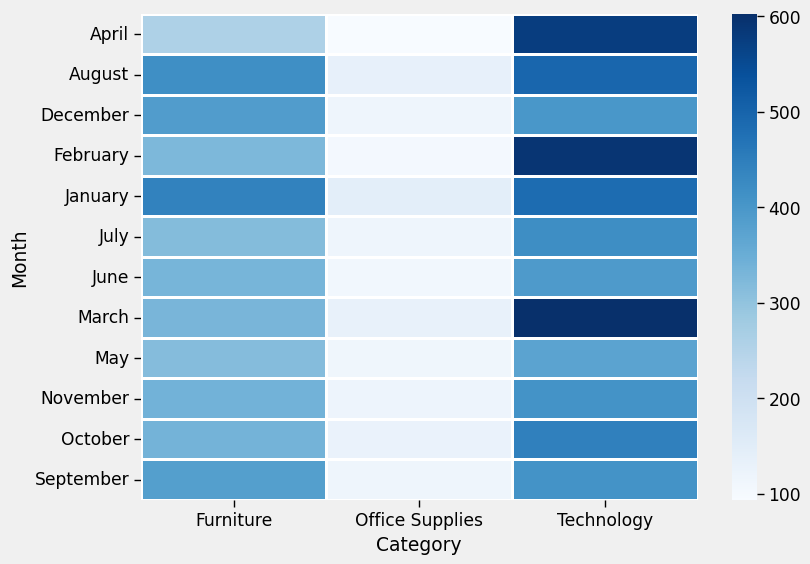

In [59]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
df_mon=df[["Month","Sales","Category"]]
df_mon = df_mon.pivot_table(index='Month', columns='Category', values='Sales')
sns.heatmap(df_mon, cmap='Blues', linecolor='white', linewidth=1)

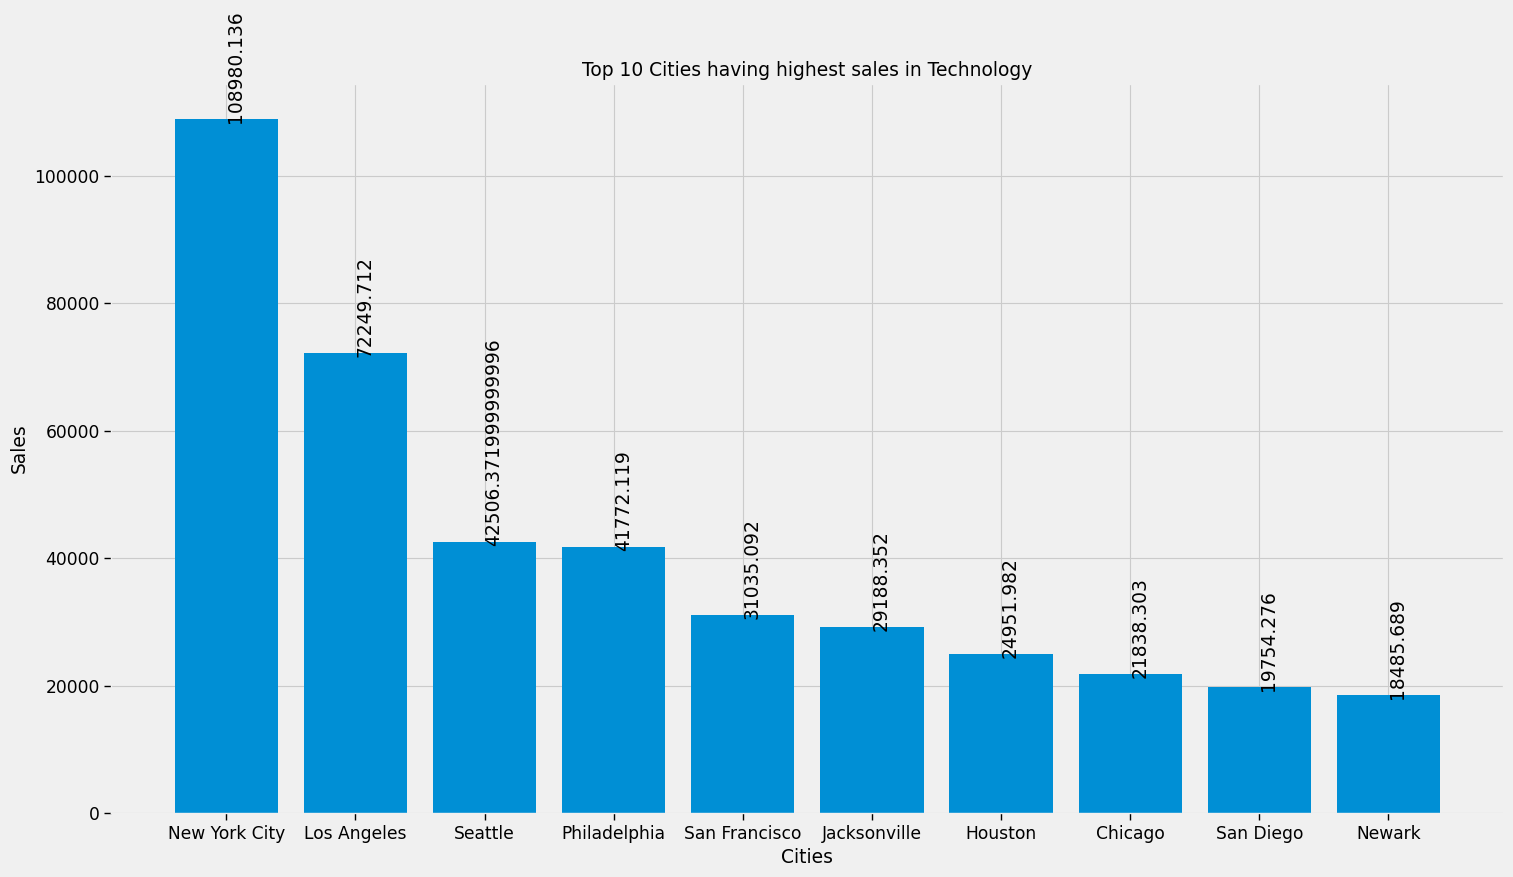

In [60]:
df_tech=df[["City","Category","Sales"]]
df_tech=df_tech[["City","Category","Sales"]][df_tech["Category"]=="Technology"]
df_tech=df_tech.groupby("City").sum()
df_tech=df_tech.reset_index()
df_tech=df_tech.sort_values(by="Sales",ascending=False,ignore_index=True).head(10)
plt.figure(figsize=(16,9))
plt.bar(df_tech["City"],df_tech["Sales"])
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.title("Top 10 Cities having highest sales in Technology")
for x,y in df_tech["Sales"].items():
    plt.text(x,y,str(y),rotation=90)
plt.show()

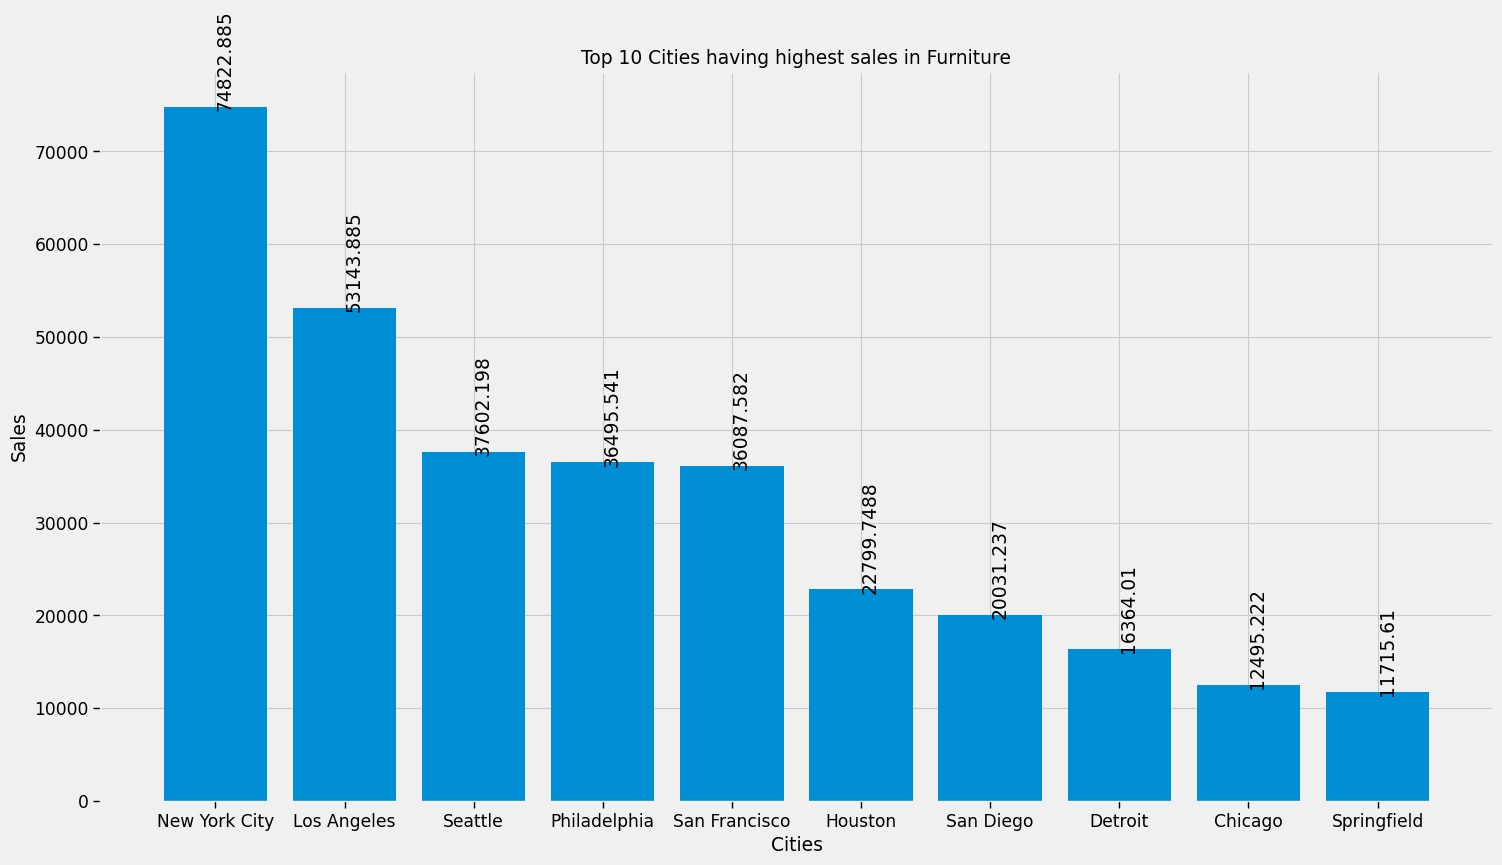

In [61]:
df_fur=df[["City","Category","Sales"]]
df_fur=df_fur[["City","Category","Sales"]][df_fur["Category"]=="Furniture"]
df_fur=df_fur.groupby("City").sum()
df_fur=df_fur.reset_index()
df_fur=df_fur.sort_values(by="Sales",ascending=False,ignore_index=True).head(10)
plt.figure(figsize=(16,9))
plt.bar(df_fur["City"],df_fur["Sales"])
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.title("Top 10 Cities having highest sales in Furniture")
for x,y in df_fur["Sales"].items():
    plt.text(x,y,str(y),rotation=90)
plt.show()

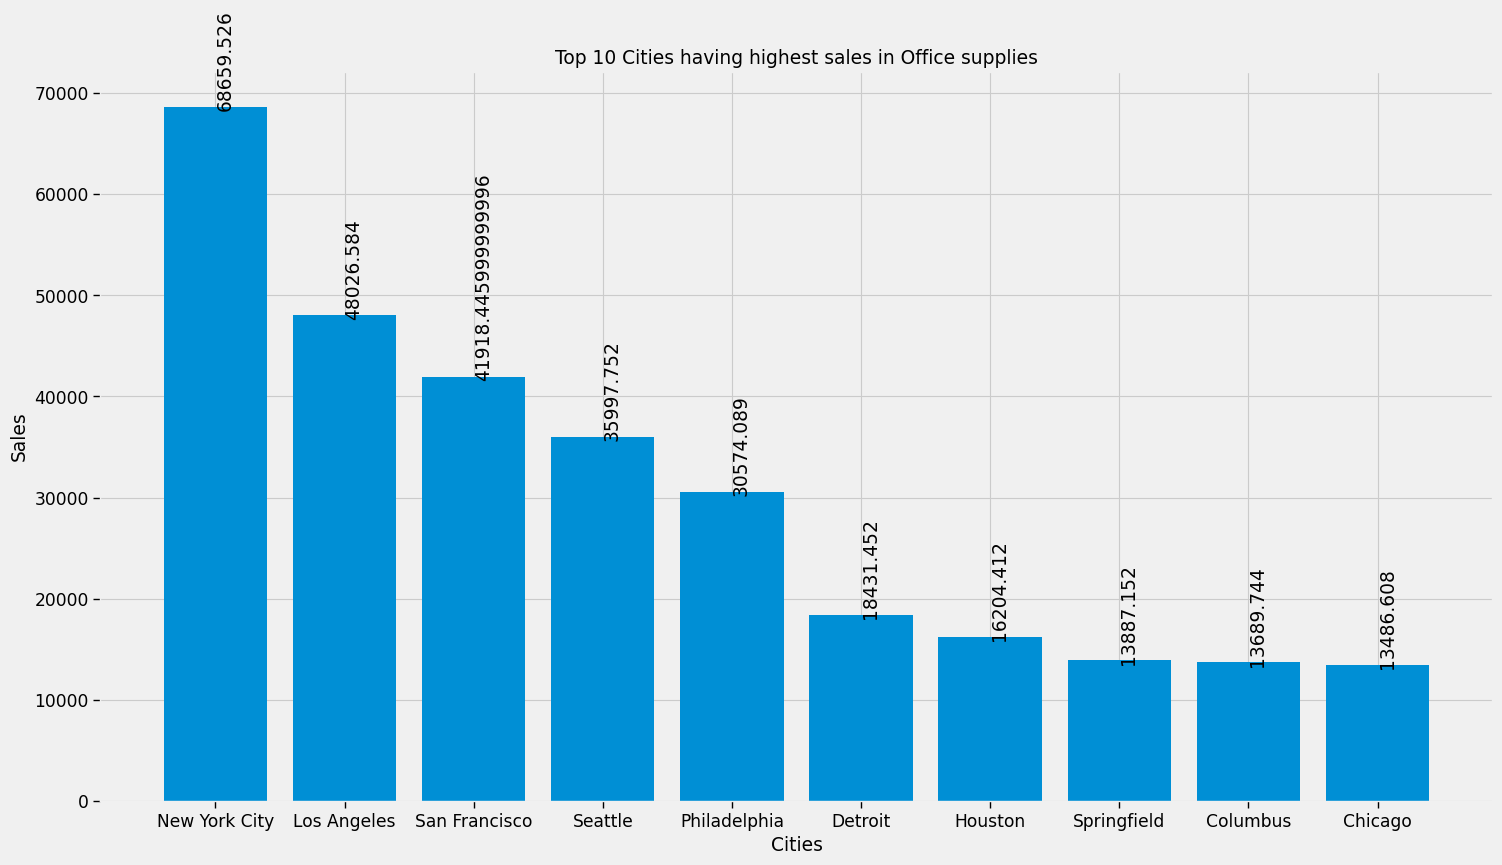

In [62]:
df_off=df[["City","Category","Sales"]]
df_off=df_off[["City","Category","Sales"]][df_off["Category"]=="Office Supplies"]
df_off=df_off.groupby("City").sum()
df_off=df_off.reset_index()
df_off=df_off.sort_values(by="Sales",ascending=False,ignore_index=True).head(10)
plt.figure(figsize=(16,9))
plt.bar(df_off["City"],df_off["Sales"])
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.title("Top 10 Cities having highest sales in Office supplies")
for x,y in df_off["Sales"].items():
    plt.text(x,y,str(y),rotation=90)
plt.show()

In [64]:
# creating the columns 'Year' and 'Month'

df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

In [65]:
# Agrouping a dataframe by sum of sales of every month in every year

df_period = df.groupby("Year")["Sales"].sum().reset_index()

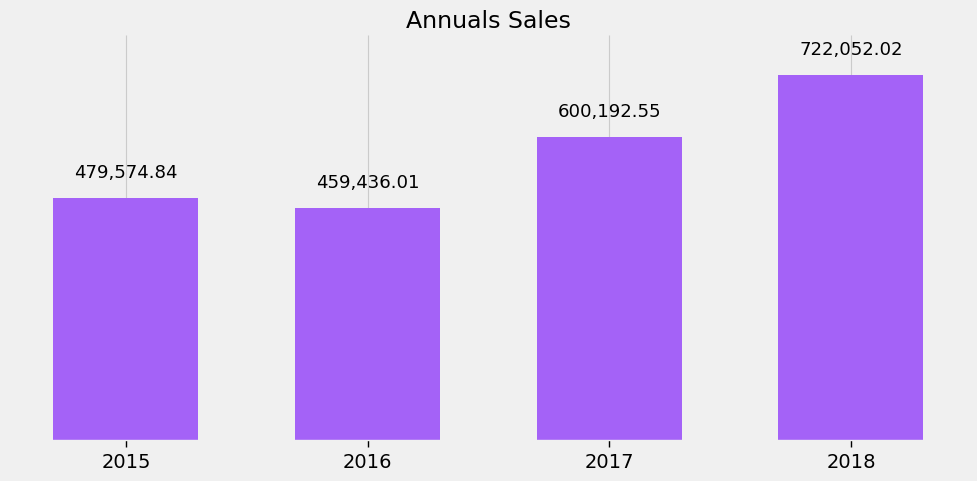

In [67]:
fig, ax = plt.subplots(figsize=(11, 5))

ax.bar(df_period.Year.values.astype(str), df_period.Sales.values, color='#A462F7', width=0.6)

for i in range(0, 4):
    ax.annotate(
        '{:,.2f}'.format(df_period.Sales[i]),
        (i, df_period.Sales[i]),
        ha='center',
        xytext=(0, 15),
        textcoords="offset points",
        fontsize=13
    )
    
ax.set_yticks(np.array([0, 800000]))
ax.yaxis.set_visible(False)
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_title("Annuals Sales", fontsize=17)
ax.tick_params(axis='x', labelsize=14)
plt.show()

In [68]:
# Now, using every month of every year

df_month = df.groupby(["Year", "Month"])["Sales"].sum().reset_index()

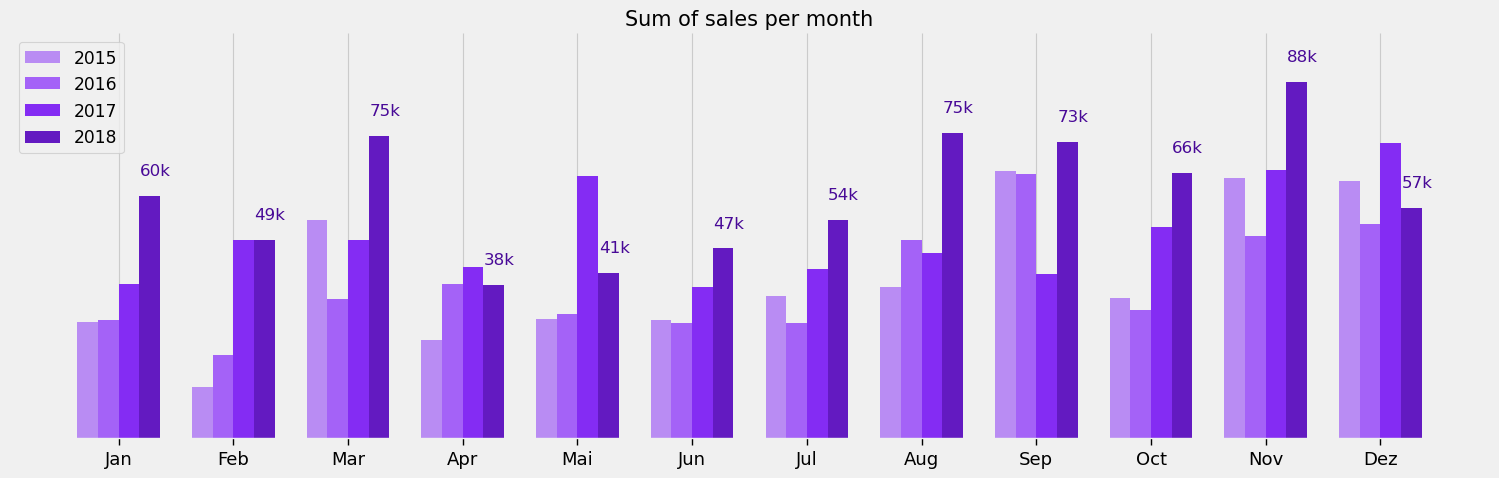

In [69]:
fig, ax = plt.subplots(figsize=(17, 5))

w=0.18

ax.bar(df_month[df_month.Year == 2015].Month.values-w-w/2, df_month[df_month.Year == 2015].Sales.values,
      label="2015", width=w, color='#B98CF3')
ax.bar(df_month[df_month.Year == 2016].Month.values-w/2, df_month[df_month.Year == 2016].Sales.values,
      label="2016", width=w, color='#A462F7')
ax.bar(df_month[df_month.Year == 2017].Month.values+w/2, df_month[df_month.Year == 2017].Sales.values,
      label="2017", width=w, color='#842CF3')
ax.bar(df_month[df_month.Year == 2018].Month.values+w+w/2, df_month[df_month.Year == 2018].Sales.values,
      label="2018", width=w, color='#631AC1')

for i in range(0, 12):
    ax.annotate(
        "{:,.0f}k".format(df_month[df_month.Year == 2018].Sales.values[i]/1000),
        (i+1.05+w+w/2, df_month[df_month.Year == 2018].Sales.values[i]),
        ha="center",
        xytext=(0, 15),
        textcoords="offset points",
        color='#480997',
        fontsize=12
    )

ax.set_title("Sum of sales per month", fontsize=15)
ax.set_yticks(np.array([0, 100000]))
ax.xaxis.set_ticks(np.arange(1, 13))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dez"])
ax.tick_params(axis='x', labelsize=13)
ax.legend()
ax.yaxis.set_visible(False)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

In [70]:
df.Category.value_counts()

Office Supplies    5909
Furniture          2077
Technology         1813
Name: Category, dtype: int64

In [71]:
# agrouping by 'Category' and 'Sales'

df_category = df.groupby("Category")["Sales"].sum()

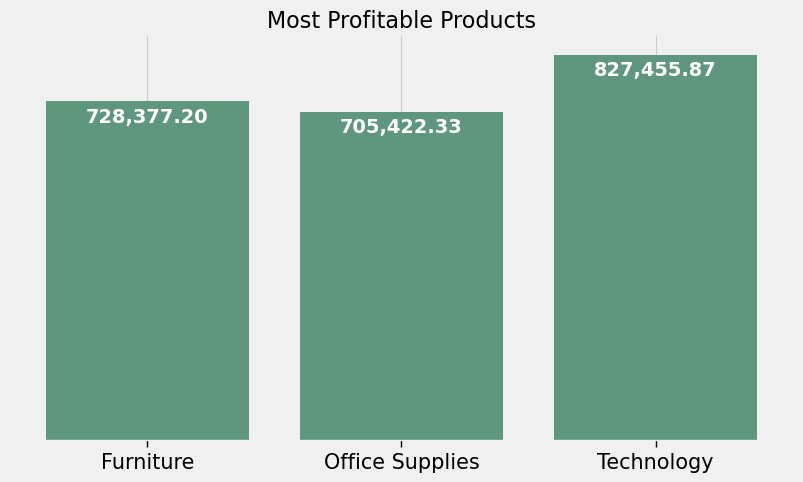

In [72]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.bar(df_category.index, df_category.values, color='#5f967e')

for i in range(0, 3):
    ax.annotate("{:,.2f}".format(df_category.values[i]), (i, df_category.values[i]),
                ha='center', xytext=(0, -15), textcoords="offset points", color='#fff', fontsize=14, fontweight='bold')

ax.spines[["top", "left", "right"]].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title("Most Profitable Products", fontsize=16)
ax.tick_params(axis='x', labelsize=15)
plt.show()

In [73]:
# now, with 'Year'

df_category_year = df.groupby(["Year", "Category"])["Sales"].sum().reset_index()

In [74]:
display(df_category_year)

,Year,Category,Sales
0,2015,Furniture,156196.5091
1,2015,Office Supplies,149512.8200
2,2015,Technology,173865.5070
3,2016,Furniture,164053.8674
4,2016,Office Supplies,133124.4070
5,2016,Technology,162257.7310
6,2017,Furniture,195813.0400
7,2017,Office Supplies,182417.5660
8,2017,Technology,221961.9440
9,2018,Furniture,212313.7872


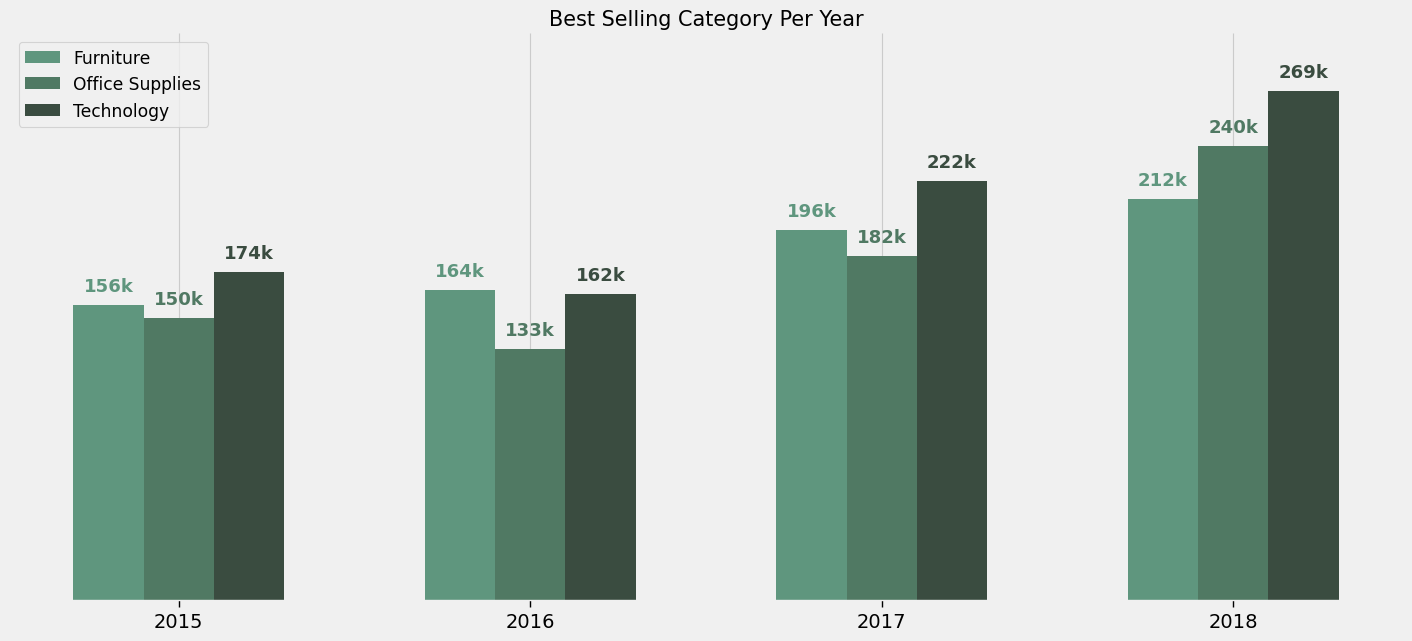

In [75]:
fig, ax = plt.subplots(figsize=(16, 7))

w=0.2

ax.bar(df_category_year[df_category_year.Category == "Furniture"].Year.values-w,
       df_category_year[df_category_year.Category == "Furniture"].Sales.values, width=w,
       label="Furniture", color='#5f967e')

ax.bar(df_category_year[df_category_year.Category == "Office Supplies"].Year.values,
       df_category_year[df_category_year.Category == "Office Supplies"].Sales.values, width=w,
       label="Office Supplies", color='#507963')

ax.bar(df_category_year[df_category_year.Category == "Technology"].Year.values+w,
       df_category_year[df_category_year.Category == "Technology"].Sales.values, width=w,
       label="Technology", color='#3a4c40')

for i in range(0, 4):
    ax.annotate(
        "{:,.0f}k".format(df_category_year[df_category_year.Category == "Furniture"].Sales.values[i] / 1000),
        (i+2015-w, df_category_year[df_category_year.Category == "Furniture"].Sales.values[i]),
        ha='center',
        xytext=(0, 10),
        textcoords="offset points",
        color='#5f967e',
        fontsize=13,
        fontweight='bold'
    )
    ax.annotate(
        "{:,.0f}k".format(df_category_year[df_category_year.Category == "Office Supplies"].Sales.values[i] / 1000),
        (i+2015, df_category_year[df_category_year.Category == "Office Supplies"].Sales.values[i]),
        ha='center',
        xytext=(0, 10),
        textcoords="offset points",
        color='#507963',
        fontsize=13,
        fontweight='bold'
    )
    ax.annotate(
        "{:,.0f}k".format(df_category_year[df_category_year.Category == "Technology"].Sales.values[i] / 1000),
        (i+2015+w, df_category_year[df_category_year.Category == "Technology"].Sales.values[i]),
        ha='center',
        xytext=(0, 10),
        textcoords="offset points",
        color='#3a4c40',
        fontsize=13,
        fontweight='bold'
    )

ax.set_title("Best Selling Category Per Year", fontsize=15)
ax.xaxis.set_ticks(np.arange(2015, 2019))
ax.tick_params(axis='x', labelsize=14)
ax.yaxis.set_visible(False)
ax.set_yticks(np.array([0, 300000]))
ax.spines[["top", "left", "right"]].set_visible(False)
ax.legend()
plt.show()

In [76]:
# using the column 'Product Name'

best_prod = df.groupby("Product Name")["Sales"].sum().reset_index().sort_values("Sales", ascending=False)

In [77]:
n = 10 # top n products
top_n_prod = best_prod.head(n)
top_n_prod

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


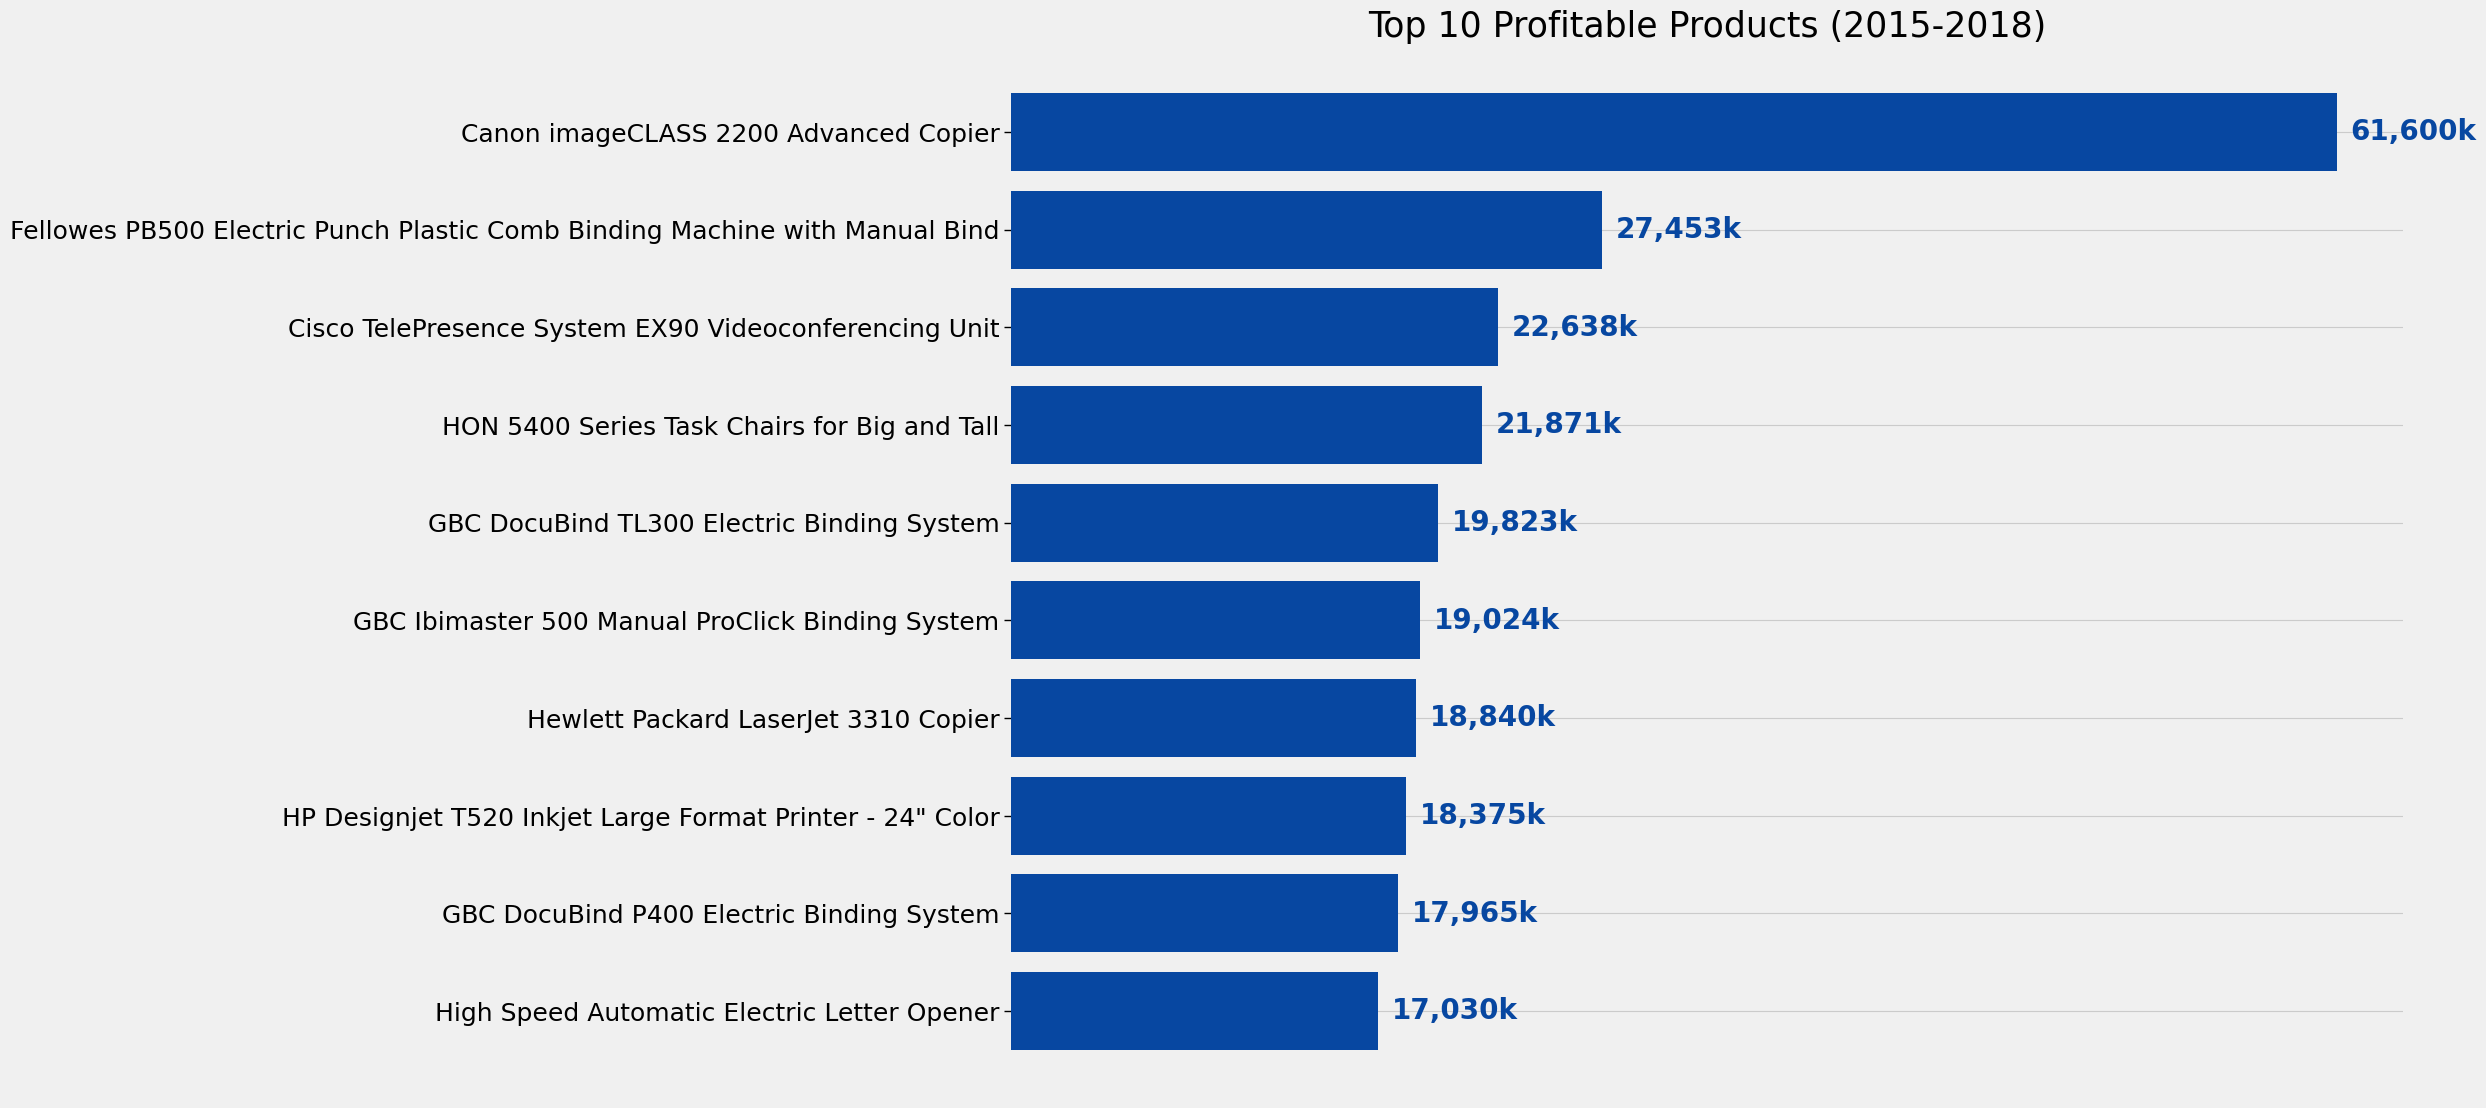

In [78]:
fig, ax = plt.subplots(figsize=(16, n+3))

ax.barh(
    y=top_n_prod["Product Name"].values,
    width=top_n_prod.Sales.values,
    color='#0747a1'
)

for i in range(0, n):
    ax.annotate(
        "{:,.0f}k".format(top_n_prod.Sales.values[i]),
        (top_n_prod.Sales.values[i], i),
        va='center',
        xytext=(10, 0),
        textcoords='offset points',
        fontsize=20,
        fontweight='bold',
        color='#0747a1'
    )
    
ax.set_title(f"Top {n} Profitable Products (2015-2018)", fontsize=25)
ax.tick_params(axis='y', labelsize=18)
ax.spines[:].set_visible(False)
ax.xaxis.set_visible(False)
ax.invert_yaxis()
plt.show()

In [79]:
# grouping by 'Year' and 'Product Name'

items = df.groupby(["Product Name", "Year"])["Sales"].sum().reset_index()

In [80]:
# creating another DataFrame for using merge

df_years = pd.DataFrame([2018, 2017, 2016, 2015])
df_years.columns = ["Year"]
df_years

,Year
0,2018
1,2017
2,2016
3,2015


In [81]:
df_years["merge"] = "merging"
best_prod["merge"] = "merging"

In [82]:
n = 10
top_n_prod = best_prod.head(n)
top_n_prod

,Product Name,Sales,merge
404,Canon imageCLASS 2200 Advanced Copier,61599.824,merging
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,merging
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480,merging
785,HON 5400 Series Task Chairs for Big and Tall,21870.576,merging
685,GBC DocuBind TL300 Electric Binding System,19823.479,merging
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500,merging
804,Hewlett Packard LaserJet 3310 Copier,18839.686,merging
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,merging
682,GBC DocuBind P400 Electric Binding System,17965.068,merging
812,High Speed Automatic Electric Letter Opener,17030.312,merging


In [83]:
top_df_years = pd.merge(
    top_n_prod, 
    df_years,
    on='merge',
    how='outer'
)

top_df_years.head()

,Product Name,Sales,merge,Year
0,Canon imageCLASS 2200 Advanced Copier,61599.824,merging,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,merging,2017
2,Canon imageCLASS 2200 Advanced Copier,61599.824,merging,2016
3,Canon imageCLASS 2200 Advanced Copier,61599.824,merging,2015
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,merging,2018


In [84]:
df_items_top = pd.merge(
    top_df_years,
    items,
    on=['Product Name', 'Year'],
    how='left'
)

df_items_top.drop("merge", axis=1, inplace=True)
df_items_top.head()

,Product Name,Sales_x,Year,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,61599.824,2017,25899.926
2,Canon imageCLASS 2200 Advanced Copier,61599.824,2016,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.824,2015,NaN
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,2018,7371.742


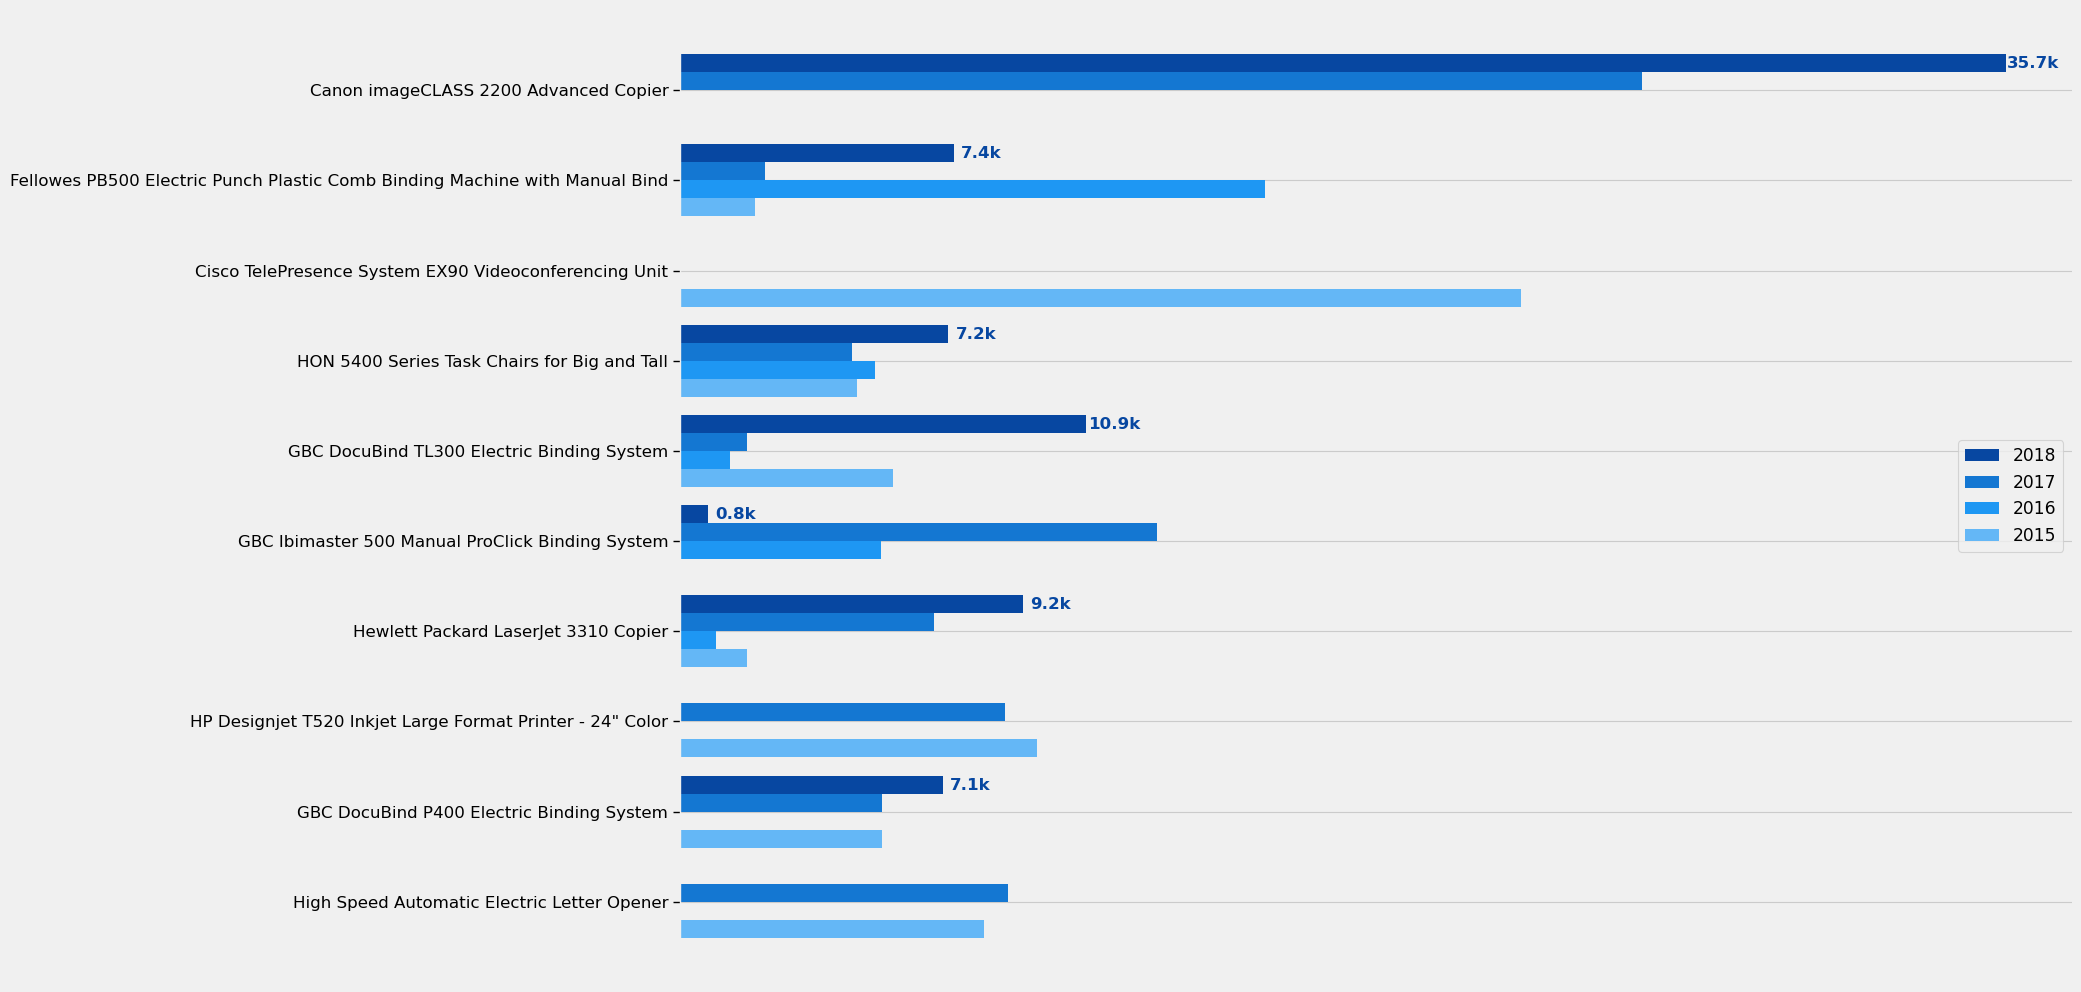

In [85]:
fig, ax = plt.subplots(figsize=(16, 12))

hgt = 0.2

ax.barh(
    np.arange(0, n) - hgt - hgt/2,
    df_items_top[df_items_top.Year == 2018]["Sales_y"].values,
    height=hgt,
    label=2018,
    color='#0747a1'
)
ax.barh(
    np.arange(0, n) - hgt/2,
    df_items_top[df_items_top.Year == 2017]["Sales_y"].values,
    height=hgt,
    label=2017,
    color='#1477d2'
)
ax.barh(
    np.arange(0, n) + hgt/2,
    df_items_top[df_items_top.Year == 2016]["Sales_y"].values,
    height=hgt,
    label=2016,
    color='#1e97f3'
)
ax.barh(
    np.arange(0, n) + hgt + hgt/2,
    df_items_top[df_items_top.Year == 2015]["Sales_y"].values,
    height=hgt,
    label=2015,
    color='#64b7f6'
)

for i in range(0, n):
    ax.annotate(
        "{:,.1f}k".format(df_items_top[df_items_top.Year == 2018].Sales_y.values[i]/1000),
        (df_items_top[df_items_top.Year == 2018]["Sales_y"].values[i], i - hgt - hgt/2),
        ha='center', va='top', xytext=(20, 5), textcoords="offset points", fontsize=12, fontweight='bold', color='#0747a1'
    )

ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_ticks(np.arange(0, n))
ax.set_yticklabels(df_items_top[df_items_top.Year == 2018]["Product Name"].values)
ax.legend()
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.spines[["top", "bottom", "right"]].set_visible(False)
plt.show()